In [1]:
import time

import statistics 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import scikitplot as skplt

#confusion matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix


#import graphviz
from sklearn.tree import export_graphviz

## Load dataset

In [2]:
df = pd.read_csv("dataset/tennis_players.csv", skipinitialspace=True, sep=',', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 3885
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2072 non-null   object 
 1   ratio                  2072 non-null   float64
 2   num_matches_2016-2019  2072 non-null   float64
 3   ratio_2016-2019        2072 non-null   float64
 4   num_matches_2020-2021  2072 non-null   float64
 5   ratio_2020-2021        2072 non-null   float64
 6   hand                   2072 non-null   object 
 7   gender                 2072 non-null   object 
 8   ioc                    2072 non-null   object 
 9   birth                  2072 non-null   float64
 10  ht                     2072 non-null   float64
 11  minutes                2072 non-null   float64
 12  perc_ace               2072 non-null   float64
 13  serv_won_tot_seve      2072 non-null   float64
 14  bpFaced                2072 non-null   float64
 15  perc

### Adding player's rank

In [3]:
df_rank = pd.read_csv('../Task1/dataset/matches_datacleaning.csv', index_col = 0)
pd.set_option('display.max_columns', None) # to visualize all the columns
df_rank.info()

C:\Users\Gerlando\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 181501 entries, 0 to 185763
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          181501 non-null  object 
 1   tourney_name        181501 non-null  object 
 2   surface             181354 non-null  object 
 3   draw_size           181501 non-null  float64
 4   tourney_level       181501 non-null  object 
 5   tourney_date        181501 non-null  object 
 6   match_num           181501 non-null  float64
 7   winner_id           181501 non-null  float64
 8   winner_entry        25298 non-null   object 
 9   winner_name         181501 non-null  object 
 10  winner_hand         181501 non-null  object 
 11  winner_ioc          181501 non-null  object 
 12  winner_age          178681 non-null  float64
 13  loser_id            181501 non-null  float64
 14  loser_entry         43307 non-null   object 
 15  loser_name          181501 non-nul

In [4]:
winner_rank = df_rank[['winner_name', 'winner_rank']]
winner_rank.set_axis(['name', 'rank'], axis=1, inplace=True)

loser_rank = df_rank[['loser_name', 'loser_rank']]
loser_rank.set_axis(['name', 'rank'], axis=1, inplace=True)

player_rank = loser_rank.append(winner_rank)
player = df[['name']]
player = pd.merge(player, player_rank, how='left', on='name')
print(player, '\n# of nan:', player['rank'].isna().sum())

                   name    rank
0         AARON ADDISON  1037.0
1         AARON ADDISON  1254.0
2         AARON ADDISON  1255.0
3         AARON ADDISON  1047.0
4         AARON ADDISON  1055.0
...                 ...     ...
257926  ZUZANA ZLOCHOVA   343.0
257927  ZUZANA ZLOCHOVA   335.0
257928  ZUZANA ZLOCHOVA   316.0
257929  ZUZANA ZLOCHOVA   318.0
257930  ZUZANA ZLOCHOVA   316.0

[257931 rows x 2 columns] 
# of nan: 7622


In [5]:
#osserviamo quanti giocatori hanno QUALCHE nan
nan_name = player[player['rank'].isna()]
nan_name['name'].nunique()

763

In [6]:
#prendiamo la media del rank e vediamo se sono rimasti nan (per quelli che avranno nan come rank vuol dire che nel db originale 
# non era presente nessun valore di rank per quel giocatore)
player = player.groupby('name').mean()
player['rank']=player['rank'].round(0)
player['rank'].describe()

count    2037.000000
mean      490.356406
std       327.419749
min         3.000000
25%       243.000000
50%       422.000000
75%       682.000000
max      1908.000000
Name: rank, dtype: float64

In [7]:
player.isna().sum()

rank    35
dtype: int64

In [8]:
player['rank'].nunique()

947

In [9]:
player[player['rank'].isna()]

,rank
name,
ABIR EL FAHIMI,NaN
ALEX LAWSON,NaN
AMAL SULTANBEKOV,NaN
AMARNI BANKS,NaN
ANASTASIA IAMACHKINE,NaN
ANNA BOWTELL,NaN
BARBORA PALICOVA,NaN
BREANA STAMPFLI,NaN
CHARLOTTE KEMPENAERS POCZ,NaN


In [10]:
player.reset_index(inplace = True)
player

,name,rank
0,AARON ADDISON,1131.0
1,ABBIE MYERS,475.0
2,ABHINAV SANJEEV SHANMUGAM,1233.0
3,ABIGAIL TERE APISAH,422.0
4,ABIR EL FAHIMI,NaN
...,...,...
2067,ZIZOU BERGS,371.0
2068,ZOE HIVES,319.0
2069,ZOE KRUGER,750.0
2070,ZSOMBOR PIROS,454.0


In [11]:
df = pd.merge(df, player, how='left', on='name')

df.describe()

,ratio,num_matches_2016-2019,ratio_2016-2019,num_matches_2020-2021,ratio_2020-2021,birth,ht,minutes,perc_ace,serv_won_tot_seve,bpFaced,perc_df,perc_2ndwon,perc_v_ace,perc_v_df,perc_v_1stwon,rank
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.00000,2037.000000
mean,0.486609,100.942085,0.478162,23.541988,0.309913,1993.805502,179.104946,80.432832,6.716569,0.523839,871.927124,7.450516,43.113605,6.698571,6.355497,54.31431,490.356406
std,0.115073,78.005562,0.134808,26.280039,0.264866,5.063032,8.008870,16.122646,5.324856,0.146481,720.860044,3.444339,12.302156,4.583606,1.962237,19.24605,327.419749
min,0.133333,0.000000,0.000000,0.000000,0.000000,1977.000000,157.000000,55.472222,0.000000,0.037581,0.000000,0.000000,0.000000,0.070000,0.000000,0.91000,3.000000
25%,0.423077,28.000000,0.415466,0.000000,0.000000,1990.000000,173.000000,62.607850,2.400000,0.505333,230.000000,5.220000,40.770000,2.550000,5.390000,39.42750,243.000000
50%,0.500000,82.000000,0.500000,12.000000,0.375000,1994.000000,178.000000,82.359127,5.755000,0.580575,638.500000,6.950000,47.295000,6.155000,6.615000,64.30500,422.000000
75%,0.565673,170.000000,0.566866,45.000000,0.533333,1998.000000,185.705882,94.008066,9.840000,0.614162,1446.500000,9.172500,50.112500,10.312500,7.552500,69.80000,682.000000
max,0.845161,309.000000,1.000000,101.000000,1.000000,2006.000000,198.000000,145.073643,35.390000,0.949992,3834.000000,29.860000,94.180000,23.310000,17.890000,80.79000,1908.000000


## Transform categorical features into numerical ones

In [12]:
#function to discretize the variables
#input: the dataset and the list of variables' names to discretize
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

In [13]:
#discretize the categorical variables
variables = ['hand', 'gender', 'ioc']
df = discretize_data(df, variables)

In [14]:
#drop the categorical variables since we don't need them anymore 
df.drop(columns=['name','hand', 'gender', 'ioc'], axis=1,inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ratio                  2072 non-null   float64
 1   num_matches_2016-2019  2072 non-null   float64
 2   ratio_2016-2019        2072 non-null   float64
 3   num_matches_2020-2021  2072 non-null   float64
 4   ratio_2020-2021        2072 non-null   float64
 5   birth                  2072 non-null   float64
 6   ht                     2072 non-null   float64
 7   minutes                2072 non-null   float64
 8   perc_ace               2072 non-null   float64
 9   serv_won_tot_seve      2072 non-null   float64
 10  bpFaced                2072 non-null   float64
 11  perc_df                2072 non-null   float64
 12  perc_2ndwon            2072 non-null   float64
 13  perc_v_ace             2072 non-null   float64
 14  perc_v_df              2072 non-null   float64
 15  perc

### Write to csv before classification

In [16]:
df.to_csv('dataset/players_classification.csv')

## Labels

Abbiamo bisogno di capire qual'è il target associato ad ogni insieme per fare il processo di classificazione, un idea potrebbe essere utilizzando un attributo specifico che tiene tratta delle "performance" di ogni giocatore, in modo da poter contraddistingure i giocatori più forti da quelli più deboli.

Nota: questa non è una metrica efficate perchè il vero label del giocatore viene calcolato in base al relativo ranking ma nel nostro caso avendo molti null risulta difficile stimarlo quindi se non ci sono altre alternative potrebbe essere la soluzione più efficente 

Quindi possiamo usare i percentili o i quartili

In [17]:
df.sort_values(by=['rank'])

,ratio,num_matches_2016-2019,ratio_2016-2019,num_matches_2020-2021,ratio_2020-2021,birth,ht,minutes,perc_ace,serv_won_tot_seve,bpFaced,perc_df,perc_2ndwon,perc_v_ace,perc_v_df,perc_v_1stwon,rank,hand_num,gender_num,ioc_num
1493,0.845161,229.0,0.829694,81.0,0.888889,1987.0,188.000000,118.034749,10.43,0.675834,1454.0,4.92,54.72,11.15,6.01,65.42,3.0,1,1,78
1782,0.754579,232.0,0.745690,41.0,0.804878,1991.0,168.000000,88.797710,4.19,0.590683,1808.0,5.50,48.38,4.38,7.17,58.06,3.0,1,0,71
1617,0.835616,235.0,0.842553,57.0,0.807018,1986.0,185.000000,122.658811,7.35,0.679608,1377.0,3.69,57.72,12.03,5.78,64.74,3.0,0,1,26
1672,0.828829,202.0,0.841584,20.0,0.700000,1981.0,185.000000,112.136728,17.50,0.712798,874.0,3.41,58.48,10.92,5.65,68.16,4.0,1,1,80
1021,0.699405,270.0,0.711111,66.0,0.651515,1992.0,184.000000,97.553718,15.94,0.618893,2185.0,7.84,45.59,7.41,8.34,63.85,7.0,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,0.133333,15.0,0.133333,0.0,0.000000,1999.0,172.137193,97.307692,3.15,0.391993,159.0,9.15,36.12,2.83,5.98,54.02,NaN,2,0,49
1701,0.379310,8.0,0.375000,21.0,0.380952,2002.0,177.500000,61.904040,3.20,0.409342,305.0,12.49,31.81,0.08,0.49,5.00,NaN,2,0,27
1833,0.500000,16.0,0.500000,0.0,0.000000,1994.0,173.363636,59.750000,0.00,0.130994,72.0,5.81,13.16,1.44,2.89,11.19,NaN,2,0,29
1866,0.380952,21.0,0.380952,0.0,0.000000,1994.0,172.137193,71.658654,0.72,0.482784,139.0,10.25,43.84,1.65,8.06,25.41,NaN,2,0,52


In [18]:
# label tipo1
quantile_a = df['rank'].quantile(0.25)


In [19]:
blindtest=df[df['rank'].isna()]
del blindtest['rank']

In [20]:
df = df.drop(df[df['rank'].isna()].index)


In [21]:
labels = []
for index, rank in df['rank'].items():
    if rank <= quantile_a:
        labels.append(0)
    else:
        labels.append(1)

In [22]:
class_names = ['high-level', 'low-level']

In [23]:
classes = pd.DataFrame()
classes['labels'] = labels
classes.labels.value_counts(True)

1    0.746686
0    0.253314
Name: labels, dtype: float64

### Prepare dataset (splitting)

In [24]:
del df['rank']

In [25]:
#use stratify because database contain unbalanced label, in this way it's possible to mantain this percentage 
#of label in train and test set 
train_set, test_set, train_label, test_label = train_test_split(df, labels, stratify=labels, test_size=0.25)

In [26]:
np.size(train_label)

1527

# Classification 

Abbiamo usato diversi metodi di classificazione in particolare:

- Decision Tree
- Bayesian classifier
- Neural Network
- KNN

da aggiungere:
- Rule based classified 
- SVM
- AdaBoosting
- Random forest

## Classfication with decision tree

In [106]:
#Library for decision tree
from sklearn import tree
from sklearn.metrics import classification_report
import pydotplus 
from IPython.display import Image

### Grid Search

In [28]:
dt_max_depth = [2,3,5,6,7,10,12,None]
dt_min_samples_split = sp_randint(2, 51)
min_samples_leaf = sp_randint(1, 51)
criterion = ["entropy", "gini"]
splitter = ["best", "random"]
max_features = [None, 2, 3, 4, 5]

dt_param_grid = {
    "max_depth": dt_max_depth,
    "min_samples_split": dt_min_samples_split.rvs(5),
    "min_samples_leaf": min_samples_leaf.rvs(5),
    "criterion": criterion,
    "splitter": splitter,
    "max_features": max_features,
    "class_weight":[None, {0: 0.65, 1: 0.25}]
    }


#define the grid search
dt_grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=dt_param_grid, n_jobs=10
                            scoring=make_scorer(f1_score))

In [29]:
best_model = dt_grid.fit(train_set, train_label)
print(dt_grid.best_params_)
train_pred_dt = dt_grid.predict(train_set)
test_pred_dt = dt_grid.predict(test_set)

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 22, 'min_samples_split': 37, 'splitter': 'random'}


In [30]:
blind_pred_dt = dt_grid.predict(blindtest)

In [31]:
dot_data = export_graphviz(best_model.best_estimator_, out_file=None, 
            filled=True, rounded=True, class_names=['0','1'])

In [32]:
graph = pydotplus.graph_from_dot_data(dot_data)
print(graph.to_string())
#Image(graph.create_png()) AGGIUSTARE


digraph Tree {
node [color="black", fontname="helvetica", shape=box, style="filled, rounded"];
edge [fontname="helvetica"];
0 [fillcolor="#7cbeee", label="X[16] <= 1.879\ngini = 0.378\nsamples = 1527\nvalue = [387, 1140]\nclass = 1"];
1 [fillcolor="#9ecff2", label="X[10] <= 1622.857\ngini = 0.447\nsamples = 1135\nvalue = [383, 752]\nclass = 1"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [fillcolor="#70b8ec", label="X[1] <= 98.279\ngini = 0.341\nsamples = 870\nvalue = [190, 680]\nclass = 1"];
1 -> 2;
3 [fillcolor="#48a4e7", label="X[1] <= 36.1\ngini = 0.13\nsamples = 556\nvalue = [39, 517]\nclass = 1"];
2 -> 3;
4 [fillcolor="#3ea0e6", label="X[17] <= 0.039\ngini = 0.053\nsamples = 296\nvalue = [8, 288]\nclass = 1"];
3 -> 4;
5 [fillcolor="#47a4e7", label="X[14] <= 4.592\ngini = 0.124\nsamples = 75\nvalue = [5, 70]\nclass = 1"];
4 -> 5;
6 [fillcolor="#399de5", label="gini = 0.0\nsamples = 39\nvalue = [0, 39]\nclass = 1"];
5 -> 6;
7 [fillcolor="#59ade9", label="gini

### Evaluation of the decision tree

In [33]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print(classification_report(train_label, train_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.85      0.81      0.83       387
   low-level       0.94      0.95      0.94      1140

    accuracy                           0.91      1527
   macro avg       0.89      0.88      0.89      1527
weighted avg       0.91      0.91      0.91      1527



In [34]:
print(classification_report(test_label, test_pred_dt, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.74      0.78      0.76       129
   low-level       0.93      0.91      0.92       381

    accuracy                           0.88       510
   macro avg       0.83      0.85      0.84       510
weighted avg       0.88      0.88      0.88       510



/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


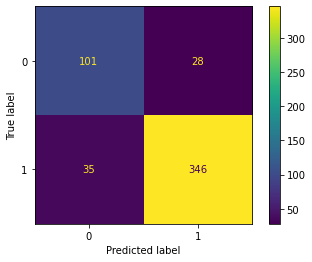

In [35]:
cm = confusion_matrix(test_label, test_pred_dt)
plot_confusion_matrix(dt_grid, test_set, test_label)
plt.show() 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

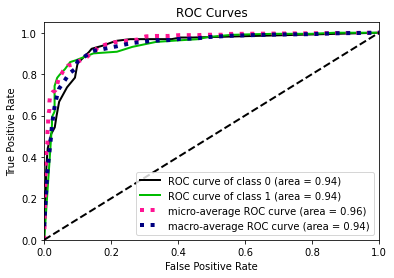

In [36]:
test_pred_proba_dt = dt_grid.predict_proba(test_set)
skplt.metrics.plot_roc(test_label, test_pred_proba_dt)

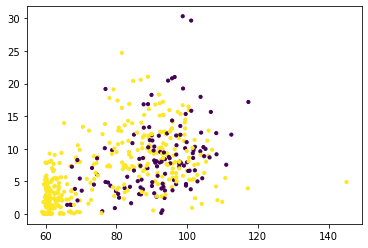

In [37]:
#ace and minutes
plt.scatter(test_set['minutes'], test_set['perc_ace'], c=test_label, s=10);

## Bayesian classifier

In [38]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [39]:
gnb = GaussianNB()
gnb.fit(train_set, train_label)
train_pred_gnb = gnb.predict(train_set)
#predict on the test set
test_pred_gnb = gnb.predict(test_set)

In [40]:
#compute the performance of the model
print(classification_report(train_label, train_pred_gnb, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.68      0.93      0.78       387
   low-level       0.97      0.85      0.91      1140

    accuracy                           0.87      1527
   macro avg       0.83      0.89      0.85      1527
weighted avg       0.90      0.87      0.88      1527



In [41]:
print(classification_report(test_label, test_pred_gnb, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.63      0.91      0.75       129
   low-level       0.97      0.82      0.89       381

    accuracy                           0.84       510
   macro avg       0.80      0.87      0.82       510
weighted avg       0.88      0.84      0.85       510



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

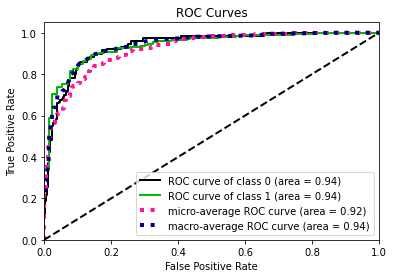

In [42]:
test_pred_proba_gnb = gnb.predict_proba(test_set)
test_pred_proba_gnb
skplt.metrics.plot_roc(test_label, test_pred_proba_gnb)

### 

## Neural Network

In [47]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [48]:
def create_model(n_neurons1, activation1, n_neurons2, activation2, optimizer, activation_out, loss): 
    # create model
    model = Sequential()
    model.add(Dense(n_neurons1, kernel_initializer='uniform', input_dim=19, activation=activation1)) 
    model.add(Dense(1,  kernel_initializer='uniform', activation=activation_out))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    return model

In [49]:
grid_param = {
    "n_neurons1":[20],
    "activation1":["relu"],
    "n_neurons2":[20],
    "activation2":["softmax"],
    "optimizer": ['adam'],
#     "activation_out":["softmax","relu","sigmoid"],
#    "dropout_rate" : [0.2],
    "activation_out":["linear"],
    "loss":["mean_squared_error"]
}

nn = KerasClassifier(build_fn=create_model, epochs=150, batch_size=32)
nn_grid = GridSearchCV(nn, param_grid=grid_param, n_jobs=-1, cv=5, scoring=make_scorer(f1_score))


In [50]:
start = time.time()
best_model = nn_grid.fit(train_set, train_label)
print(nn_grid.best_params_)
train_pred_nn = nn_grid.predict(train_set)
test_pred_nn = nn_grid.predict(test_set)
print('Time taken for fit: {} sec\n'.format(time.time() - start))

Init Plugin
Init Plugin
Init Plugin
Init Plugin
Init Graph Optimizer
Init Graph Optimizer
Init Graph Optimizer
Init Kernel
Init Kernel
Init Graph Optimizer
Init Kernel
Init Plugin
Init Kernel
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1
Metal device set to: Apple M1


2021-12-23 19:54:56.418231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-23 19:54:56.418343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-23 19:54:56.419056: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-23 19:54:56.419165: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Epoch 1/150
39/39 [==============================] - 1s 12ms/step - loss: 1.2606 - accuracy: 0.6007
Epoch 2/150
39/39 [==============================] - 1s 15ms/step - loss: 0.9264 - accuracy: 0.6236
Epoch 2/150
39/39 [==============================] - 1s 14ms/step - loss: 0.1777 - accuracy: 0.7651
Epoch 3/150
39/39 [==============================] - 0s 11ms/step - loss: 0.3184 - accuracy: 0.7551
Epoch 3/150
39/39 [==============================] - 1s 13ms/step - loss: 0.1431 - accuracy: 0.7930
Epoch 4/150
39/39 [==============================] - 0s 10ms/step - loss: 0.2398 - accuracy: 0.7535
Epoch 4/150
39/39 [==============================] - 1s 13ms/step - loss: 0.1229 - accuracy: 0.8339
Epoch 5/150
39/39 [==============================] - 0s 11ms/step - loss: 0.1154 - accuracy: 0.8453
Epoch 6/150
39/39 [==============================] - 0s 11ms/step - loss: 0.1109 - accuracy: 0.8543
Epoch 6/150
39/39 [==============================] - 0s 11ms/step - loss: 0.1288 - accuracy: 0.8190


39/39 [==============================] - 1s 13ms/step - loss: 0.1084 - accuracy: 0.8591
Epoch 12/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0978 - accuracy: 0.8822
Epoch 13/150
39/39 [==============================] - 0s 12ms/step - loss: 0.1067 - accuracy: 0.8771
Epoch 13/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0952 - accuracy: 0.8780
Epoch 14/150
39/39 [==============================] - 0s 8ms/step - loss: 0.0961 - accuracy: 0.8854
Epoch 15/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0991 - accuracy: 0.8845
Epoch 14/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0907 - accuracy: 0.8953
Epoch 15/150
39/39 [==============================] - 0s 11ms/step - loss: 0.1046 - accuracy: 0.8707
Epoch 17/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0982 - accuracy: 0.8870
Epoch 18/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0831 - accuracy: 0.8928
Epoch 

39/39 [==============================] - 0s 10ms/step - loss: 0.0872 - accuracy: 0.9083
Epoch 22/150
39/39 [==============================] - 0s 12ms/step - loss: 0.1193 - accuracy: 0.8403
Epoch 22/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9026
Epoch 23/150
39/39 [==============================] - 0s 8ms/step - loss: 0.1175 - accuracy: 0.8419
Epoch 23/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0923 - accuracy: 0.8903
Epoch 24/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1087 - accuracy: 0.8567
Epoch 25/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.9108
Epoch 27/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0826 - accuracy: 0.9025
Epoch 27/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1012 - accuracy: 0.8903
Epoch 28/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1036 - accuracy: 0.8600
Epoch

39/39 [==============================] - 1s 14ms/step - loss: 0.0962 - accuracy: 0.8780
Epoch 32/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0881 - accuracy: 0.9034
Epoch 34/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0842 - accuracy: 0.9100
Epoch 34/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0965 - accuracy: 0.8912
Epoch 34/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0788 - accuracy: 0.9051
Epoch 36/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0962 - accuracy: 0.8755
Epoch 35/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0836 - accuracy: 0.9043
Epoch 36/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0824 - accuracy: 0.9002
Epoch 36/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0830 - accuracy: 0.9001
Epoch 37/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0922 - accuracy: 0.8961
Epoch

39/39 [==============================] - 1s 14ms/step - loss: 0.0858 - accuracy: 0.8985
Epoch 55/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0885 - accuracy: 0.8960
Epoch 54/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0898 - accuracy: 0.8976
Epoch 55/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0867 - accuracy: 0.9058
Epoch 56/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0734 - accuracy: 0.9116
Epoch 56/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0781 - accuracy: 0.9100
Epoch 58/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0820 - accuracy: 0.9017
Epoch 58/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0769 - accuracy: 0.9051
Epoch 58/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0775 - accuracy: 0.9148
Epoch 60/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0858 - accuracy: 0.9025
Epoc

39/39 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9034
Epoch 65/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0837 - accuracy: 0.9017
Epoch 66/150
39/39 [==============================] - 1s 13ms/step - loss: 0.0747 - accuracy: 0.9075
Epoch 68/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0966 - accuracy: 0.8912
Epoch 68/150
39/39 [==============================] - 0s 13ms/step - loss: 0.0704 - accuracy: 0.9182
Epoch 69/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0794 - accuracy: 0.9058
Epoch 70/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0879 - accuracy: 0.9009
Epoch 72/150
39/39 [==============================] - 1s 14ms/step - loss: 0.0771 - accuracy: 0.9108
Epoch 72/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0841 - accuracy: 0.8968
Epoch 72/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0729 - accuracy: 0.9058
Epo

39/39 [==============================] - 1s 13ms/step - loss: 0.0792 - accuracy: 0.9148
Epoch 75/150
39/39 [==============================] - 0s 13ms/step - loss: 0.0807 - accuracy: 0.9002
Epoch 75/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0704 - accuracy: 0.9157
Epoch 76/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0804 - accuracy: 0.9115
Epoch 76/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0808 - accuracy: 0.9043
Epoch 76/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0742 - accuracy: 0.9075
Epoch 77/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0803 - accuracy: 0.9042
Epoch 79/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0681 - accuracy: 0.9190
Epoch 78/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0854 - accuracy: 0.9026
Epoch 79/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0703 - accuracy: 0.9140
Epoc

39/39 [==============================] - 0s 13ms/step - loss: 0.0750 - accuracy: 0.9066
Epoch 97/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0883 - accuracy: 0.9034
Epoch 98/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0833 - accuracy: 0.9050
Epoch 98/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0728 - accuracy: 0.9108
Epoch 98/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0689 - accuracy: 0.9190
Epoch 100/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0763 - accuracy: 0.9100
Epoch 101/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9009
Epoch 101/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0701 - accuracy: 0.9148
Epoch 102/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0721 - accuracy: 0.9124
Epoch 103/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0774 - accuracy: 0.9173
Epoc

39/39 [==============================] - 0s 9ms/step - loss: 0.0705 - accuracy: 0.9190
Epoch 109/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0732 - accuracy: 0.9156
Epoch 108/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 0.9034
Epoch 108/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0761 - accuracy: 0.9067
Epoch 109/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0734 - accuracy: 0.9182
Epoch 110/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0739 - accuracy: 0.9115
Epoch 111/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0721 - accuracy: 0.9124
Epoch 110/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0781 - accuracy: 0.9157
Epoch 111/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0892 - accuracy: 0.8895
Epoch 112/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9181
E

39/39 [==============================] - 0s 12ms/step - loss: 0.0748 - accuracy: 0.9058
Epoch 119/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0705 - accuracy: 0.9141
Epoch 119/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0709 - accuracy: 0.9182
Epoch 120/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0812 - accuracy: 0.9075
Epoch 122/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0726 - accuracy: 0.9140
Epoch 122/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0937 - accuracy: 0.8944
Epoch 122/150
39/39 [==============================] - 1s 13ms/step - loss: 0.0672 - accuracy: 0.9173
Epoch 124/150
39/39 [==============================] - 1s 13ms/step - loss: 0.0736 - accuracy: 0.9108
Epoch 123/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0833 - accuracy: 0.9091
Epoch 124/150
39/39 [==============================] - 0s 13ms/step - loss: 0.0862 - accuracy: 0

39/39 [==============================] - 0s 12ms/step - loss: 0.0785 - accuracy: 0.9091
Epoch 138/150
39/39 [==============================] - 0s 9ms/step - loss: 0.0857 - accuracy: 0.9017
Epoch 140/150
39/39 [==============================] - 0s 10ms/step - loss: 0.0700 - accuracy: 0.9165
Epoch 139/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0673 - accuracy: 0.9157
Epoch 142/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0709 - accuracy: 0.9133
Epoch 140/150
39/39 [==============================] - 0s 12ms/step - loss: 0.0773 - accuracy: 0.9108
Epoch 141/150
39/39 [==============================] - 0s 11ms/step - loss: 0.0731 - accuracy: 0.9173
Epoch 143/150
39/39 [==============================] - 0s 13ms/step - loss: 0.0728 - accuracy: 0.9141
Epoch 144/150
39/39 [==============================] - 1s 13ms/step - loss: 0.0777 - accuracy: 0.9156
Epoch 143/150
39/39 [==============================] - 0s 13ms/step - loss: 0.0782 - accuracy: 0.

/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")

39/39 [==============================] - 0s 9ms/step - loss: 0.0749 - accuracy: 0.9133
Epoch 150/150
12/39 [========>.....................] - ETA: 0s - loss: 0.0836 - accuracy: 0.8958

2021-12-23 19:56:02.405810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 7ms/step - loss: 0.0769 - accuracy: 0.9100


/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-12-23 19:56:02.684835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), a

Metal device set to: Apple M1


2021-12-23 19:56:19.347196: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-23 19:56:19.347402: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-23 19:56:19.542143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/150
48/48 [==============================] - 2s 6ms/step - loss: 0.2844 - accuracy: 0.7714
Epoch 2/150
48/48 [==============================] - 0s 5ms/step - loss: 0.1089 - accuracy: 0.8474
Epoch 3/150
48/48 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.8677
Epoch 4/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0967 - accuracy: 0.8703
Epoch 5/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.8795
Epoch 6/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0933 - accuracy: 0.8749
Epoch 7/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.8926
Epoch 8/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0869 - accuracy: 0.8959
Epoch 9/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.8919
Epoch 10/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0900 - accuracy: 0.8893
Epoch 11/

48/48 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9096
Epoch 84/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9194
Epoch 85/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0681 - accuracy: 0.9214
Epoch 86/150
48/48 [==============================] - 0s 6ms/step - loss: 0.0685 - accuracy: 0.9142
Epoch 87/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0691 - accuracy: 0.9155
Epoch 88/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9129
Epoch 89/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9155
Epoch 90/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0695 - accuracy: 0.9103
Epoch 91/150
48/48 [==============================] - 0s 4ms/step - loss: 0.0717 - accuracy: 0.9103
Epoch 92/150
48/48 [==============================] - 0s 5ms/step - loss: 0.0709 - accuracy: 0.9181
Epoch 93/150


/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-12-23 19:56:53.223221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/Users/domenico/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), a

In [51]:
print(classification_report(train_label, train_pred_nn, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.89      0.80      0.85       387
   low-level       0.94      0.97      0.95      1140

    accuracy                           0.93      1527
   macro avg       0.91      0.89      0.90      1527
weighted avg       0.92      0.93      0.92      1527



In [52]:
print(classification_report(test_label, test_pred_nn, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.77      0.76      0.77       129
   low-level       0.92      0.92      0.92       381

    accuracy                           0.88       510
   macro avg       0.85      0.84      0.84       510
weighted avg       0.88      0.88      0.88       510



### Accuracy

In [53]:
test=best_model.best_estimator_
history=test.fit(train_set, train_label,
                    epochs=120,
                    batch_size=500,
                    validation_split=0.4)

Epoch 1/120
2/2 [==============================] - 0s 119ms/step - loss: 1.7663 - accuracy: 0.2478 - val_loss: 0.1623 - val_accuracy: 0.8183
Epoch 2/120
2/2 [==============================] - 0s 21ms/step - loss: 0.2490 - accuracy: 0.7828 - val_loss: 0.7644 - val_accuracy: 0.7381


2021-12-23 19:57:11.241611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-23 19:57:11.373082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/120
2/2 [==============================] - 0s 25ms/step - loss: 0.7850 - accuracy: 0.7522 - val_loss: 0.7117 - val_accuracy: 0.7381
Epoch 4/120
2/2 [==============================] - 0s 25ms/step - loss: 0.5762 - accuracy: 0.7522 - val_loss: 0.2474 - val_accuracy: 0.7561
Epoch 5/120
2/2 [==============================] - 0s 25ms/step - loss: 0.1974 - accuracy: 0.7893 - val_loss: 0.1486 - val_accuracy: 0.8527
Epoch 6/120
2/2 [==============================] - 0s 24ms/step - loss: 0.1853 - accuracy: 0.8297 - val_loss: 0.3007 - val_accuracy: 0.6923
Epoch 7/120
2/2 [==============================] - 0s 25ms/step - loss: 0.3285 - accuracy: 0.6517 - val_loss: 0.3367 - val_accuracy: 0.6252
Epoch 8/120
2/2 [==============================] - 0s 26ms/step - loss: 0.3223 - accuracy: 0.7096 - val_loss: 0.2177 - val_accuracy: 0.8200
Epoch 9/120
2/2 [==============================] - 0s 22ms/step - loss: 0.1981 - accuracy: 0.8155 - val_loss: 0.1237 - val_accuracy: 0.8560
Epoch 10/120
2/2 [==

2/2 [==============================] - 0s 20ms/step - loss: 0.0898 - accuracy: 0.8854 - val_loss: 0.0772 - val_accuracy: 0.9116
Epoch 120/120
2/2 [==============================] - 0s 17ms/step - loss: 0.0897 - accuracy: 0.8854 - val_loss: 0.0769 - val_accuracy: 0.9116


### Print accuracy of best models

/var/folders/q3/n1kzrjss3rlcf4h0671f29640000gn/T/ipykernel_10415/3007715566.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training Accuracy', c='r')
/var/folders/q3/n1kzrjss3rlcf4h0671f29640000gn/T/ipykernel_10415/3007715566.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='b')


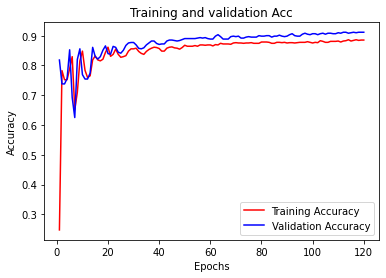

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy', c='r')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='b')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Print accuracy of best models

/var/folders/q3/n1kzrjss3rlcf4h0671f29640000gn/T/ipykernel_10415/2382457563.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', c='r')
/var/folders/q3/n1kzrjss3rlcf4h0671f29640000gn/T/ipykernel_10415/2382457563.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation Loss', c='b')


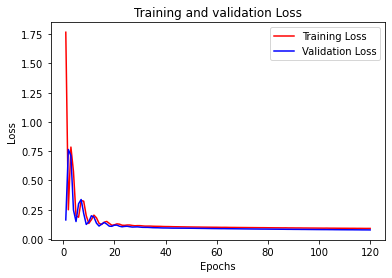

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss', c='r')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', c='b')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [64]:
train_set_no_cat = train_set.loc[:,~train_set.columns.str.contains('_num', case=False)] 
test_set_no_cat = test_set.loc[:,~test_set.columns.str.contains('_num', case=False)] 

k = math.sqrt(len(train_set))
k = round(k, 0)
k = int(k)
k = k - 10
k_range = []
for i in range(0,20):
    k_range.append(k)
    k = k + 1

In [72]:
knn_param_grid = {
    'n_neighbors': k_range,
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']
            }

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10, scoring=make_scorer(f1_score))

In [73]:
knn_grid.fit(train_set_no_cat, train_label)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                                         39, 40, 41, 42, 43, 44, 45, 46, 47,
                                         48],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score))

In [74]:
train_pred_knn = knn_grid.predict(train_set_no_cat)
test_pred_knn = knn_grid.predict(test_set_no_cat)

In [75]:
print(classification_report(train_label, train_pred_knn, target_names=class_names))

              precision    recall  f1-score   support

  high-level       1.00      1.00      1.00       387
   low-level       1.00      1.00      1.00      1140

    accuracy                           1.00      1527
   macro avg       1.00      1.00      1.00      1527
weighted avg       1.00      1.00      1.00      1527



In [76]:
print(classification_report(test_label, test_pred_knn, target_names=class_names))

              precision    recall  f1-score   support

  high-level       0.76      0.71      0.73       129
   low-level       0.90      0.92      0.91       381

    accuracy                           0.87       510
   macro avg       0.83      0.81      0.82       510
weighted avg       0.87      0.87      0.87       510



## SVM

In [80]:
from sklearn.svm import SVC

In [152]:
svm_param_grid = {
    'C' : [0.5, 1.0, 1.5, 2.0, 5.0],
    'kernel' : ['rbf', 'linear', 'poly'] 
            }

svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, n_jobs=10, cv=10, scoring=make_scorer(f1_score))

In [ ]:
svm_grid.fit(train_set, train_label)

In [ ]:
train_pred_svm = svm_grid.predict(train_set)
test_pred_svm = svm_grid.predict(test_set)

In [ ]:
print('---TRAIN report:---\n', classification_report(train_label, train_pred_svm, target_names=class_names))
print('---TEST report:---\n',classification_report(test_label, test_pred_svm, target_names=class_names))

In [ ]:
cm = confusion_matrix(test_label, test_pred_svm)
plot_confusion_matrix(svm_grid, test_set, test_label)
plt.show() 

In [ ]:
test_pred_proba_svm = svm_grid.predict_proba(test_set)
skplt.metrics.plot_roc(test_label, test_pred_proba_svm)

## Rule Based Classifier

In [ ]:
import wittgenstein as lw
param_grid = {
    "prune_size": [0.2, 0.5, 0.6, 0.7], 
    "k": [1, 3, 5, 7, 10]
}
rb_grid = GridSearchCV(lw.RIPPER(), param_grid=param_grid)

In [ ]:
rb_grid.fit(train_set, train_label)
train_pred_rb = svm_grid.predict(train_set)
test_pred_rb = svm_grid.predict(test_set)

In [ ]:
print('---TRAIN report:---\n', classification_report(train_label, train_pred_rf, target_names=class_names))
print('---TEST report:---\n',classification_report(test_label, test_pred_rf, target_names=class_names))

### Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
param_dist = {"max_depth": [2,3,5,6,7,10,12,None],
              "max_features": sp_randint(1, len(train_set.iloc[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "bootstrap": [True, False],
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.65, 1: 0.35}]}

rf_grid = RandomizedSearchCV(RandomForestClassifier(n_estimators=30), param_distributions=param_dist, 
                            n_iter=50, 
                            n_jobs=10, 
                            scoring=make_scorer(accuracy_score))


In [145]:
#run the grid search
rf_grid.fit(train_set, train_label)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=30), n_iter=50,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None,
                                                         {0: 0.65, 1: 0.35}],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BED2FBA00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BED311D90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BED29F7F0>},
                   scoring=make_scorer(accuracy_sc

In [146]:
train_pred_rf = rt_grid.predict(train_set)
test_pred_rf = rt_grid.predict(test_set)

In [147]:
print('---TRAIN report:---\n', classification_report(train_label, train_pred_rf, target_names=class_names))
print('---TEST report:---\n',classification_report(test_label, test_pred_rf, target_names=class_names))

---TRAIN report:---
               precision    recall  f1-score   support

  high-level       0.87      0.88      0.87       387
   low-level       0.96      0.96      0.96      1140

    accuracy                           0.94      1527
   macro avg       0.92      0.92      0.92      1527
weighted avg       0.94      0.94      0.94      1527

---TEST report:---
               precision    recall  f1-score   support

  high-level       0.85      0.81      0.83       129
   low-level       0.94      0.95      0.94       381

    accuracy                           0.92       510
   macro avg       0.89      0.88      0.89       510
weighted avg       0.91      0.92      0.92       510



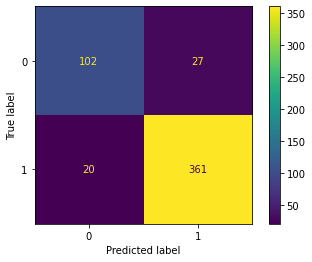

In [148]:
cm = confusion_matrix(test_label, test_pred_rf)
plot_confusion_matrix(rf_grid, test_set, test_label)
plt.show() 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

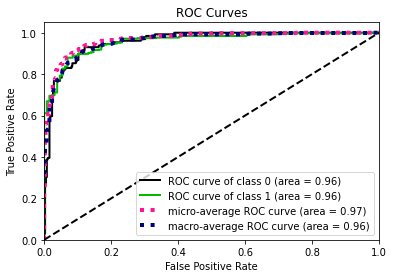

In [149]:
test_pred_proba_rf = rf_grid.predict_proba(test_set)
skplt.metrics.plot_roc(test_label, test_pred_proba_rf)

In [ ]:

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_rf)
auc = metrics.roc_auc_score(test_label, test_pred_rf)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_dt)
auc = metrics.roc_auc_score(test_label, test_pred_dt)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_gnb)
auc = metrics.roc_auc_score(test_label, test_pred_gnb)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc))

plt.legend(loc=0)